<h1><center>Data Analysis</center></h1>
<h2><center>Kaggle report notebook</center></h2>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

## Team name: DK
## Team members: Oleynik Dmitry, Golovko Kirill, Konchagin Andrey

# Task

In this task we are working with posts on famous russian advertisement and resell platform.

Ginen information about the post and corresponding item you have to estimate its probability to be sold in 3 days.

Below you will find some desirable stages of your report.

# Data Loading

In [6]:
data = pd.read_csv('./train.tsv.gz', sep='\t', index_col=0)
data_submit = pd.read_csv('./test_nolabel.tsv.gz', sep='\t', index_col=0)

In [9]:
data.columns

Index(['category_id', 'city', 'date_created', 'delivery_available',
       'desc_text', 'img_num', 'lat', 'long', 'name_text', 'owner_id',
       'payment_available', 'price', 'product_id', 'product_type',
       'properties', 'region', 'sold_mode', 'subcategory_id', 'sold_fast'],
      dtype='object')

# Descriptive Data Analysis

* Analyze train dataset features
    * Provide some meaningfull description about corresponding features (in form of pictures or some coefficients)
    * Outline any findings you are able to reveal
* Try to measure analyse any correspondense between features and target features

Let's see some rows


In [10]:
data

,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,payment_available,price,product_id,product_type,properties,region,sold_mode,subcategory_id,sold_fast
1,4,Краснодар,2018-10-08,False,"Продаю стол раскладной, деревянный, советский ...",3,45.0686,38.9518,Стол,4ce583fe8231a0cc4a3c7d241c7d0289,True,500.0,8cb80c05c65c210275f5500779d6b593,1,"[{'slug_id': 'stoly_stulya_tip', 'slug_name': ...",Краснодарский край,1,410,1
2,4,Тюмень,2018-06-18,False,"Тарелки глубокие 6 шт. Блюдца, чашки по 6 шт. ...",2,57.1840,65.5674,Посуда,e58be2c8f143c17246dc2243b5d3b98f,False,300.0,3b7a9f8b27a53b63525f95bc8070abb2,1,"[{'slug_id': 'dom_dacha_posuda_tip', 'slug_nam...",Тюменская область,1,405,0
4,9,Омск,2018-07-31,True,"Новый,с этикеткой. Размер L. Не подошёл по раз...",1,54.9889,73.4312,Костюм,51b408796027214232532b7e478e2159,True,1100.0,c97dd9c5a3e938c52cf5d7822bc0eb7b,1,[{'slug_id': 'zhenskaya_odezhda_pidzhaki_kosty...,Омская область,1,908,0
6,3,Санкт-Петербург,2018-04-17,False,"Складывается тростью, все колеса вниз. Сплошна...",4,59.9590,30.4877,Коляска,6544b83acbbf04439a7ba983093cafb4,True,5000.0,3e5d0286b25fd7f62f88bc436a59ae4e,1,"[{'slug_id': 'waggon_type', 'slug_name': 'Тип'...",Ленинградская область,1,312,0
10,5,Москва,2018-02-09,False,"Неразлучники, птичкам по 1,5 года. Продаю с бо...",2,55.6473,37.4118,Волнистые попугаи,ea575e28daf1f47bfce63015cd3ce5cf,True,2000.0,57b4a8679d0d3eb1e31367b57221098f,1,[],Московская область,1,504,0
11,11,Гусь-Хрустальный,2018-04-28,False,"Продам детский велосипед,двухколесный,лет для ...",1,55.6063,40.6564,Велосипед детский,9ba6bb7a01bf0e577a36682da64a5dde,True,800.0,c73fd3f12f71c73ad4fa9c1b4b4f3629,1,"[{'slug_id': 'sport_tzvet', 'slug_name': 'Цвет...",Владимирская область,1,1107,0
12,5,Якутск,2018-02-08,False,"Отдам кота, 8 месяцев, к горшку приучен.",1,62.0355,129.6755,скоттиш страйт,7e0e13efb64cfbb1daf62a87ed63bf1f,False,1.0,be19161f29cc7e6e1795f756ef9e29e0,1,"[{'slug_id': 'koshki_poroda', 'slug_name': 'По...",Республика Саха (Якутия),1,503,0
13,13,Краснодар,2018-10-14,False,ТВ в рабочем состоянии,3,45.0618,38.9170,LE32R72B,e8e578f2dd291cc1b2e5944cb869028a,False,6000.0,c76ee67dfc81c0f06a3d908370a2f59e,1,"[{'slug_id': 'televizory_marka', 'slug_name': ...",Краснодарский край,1,1302,0
14,25,Орск,2018-06-02,False,1991 г.в.Пробег около 20000 км. Документы есть...,2,51.2585,58.6035,Минск,a992d673ee26064a0e9d157296244739,False,15000.0,c19620c06a40e40445854c4f665416da,1,"[{'slug_id': 'motocikly_skutery_tip', 'slug_na...",Оренбургская область,1,2503,0
15,2,Москва,2018-06-20,False,Продаю срочно бу хорошем состоянии два по 1.5 ...,3,55.8134,37.5958,Холодильники бу,fd9f4d97a20b9d279de9b45ba78d5874,True,12000.0,22670ae3efc3d73a3bec355ce05561ea,1,"[{'slug_id': 'oborudovanie_tip', 'slug_name': ...",Московская область,1,202,0


Let's plot some of them

Category

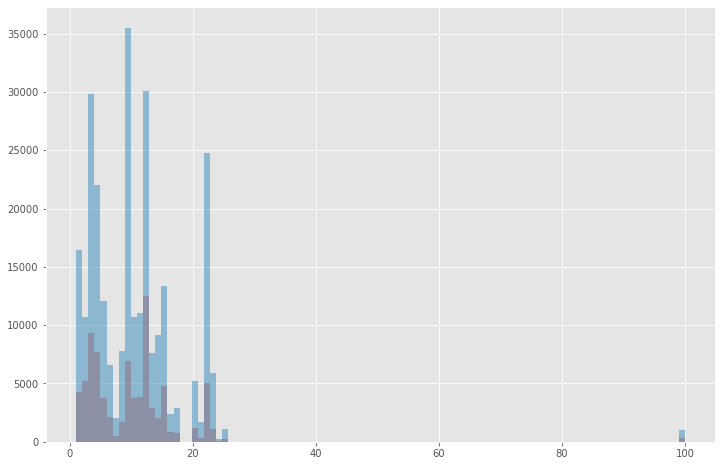

In [38]:
plt.hist(data['category_id'][data['sold_fast'] == 1].values, bins=100, alpha=0.5)
plt.hist(data['category_id'][data['sold_fast'] == 0].values, bins=100, alpha=0.5)
plt.show()

delivery_availible

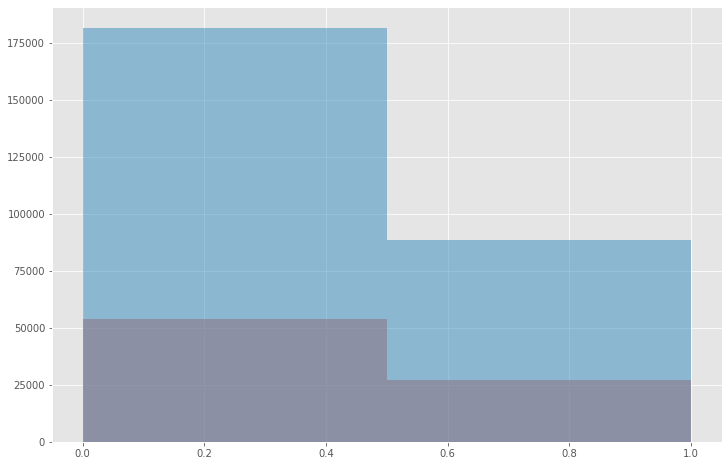

In [41]:
plt.hist((data['delivery_available'] * 1)[data['sold_fast'] == 1].values, bins=2,  alpha=0.5)
plt.hist((data['delivery_available'] * 1)[data['sold_fast'] == 0].values, bins=2,  alpha=0.5)
plt.show()

img_num

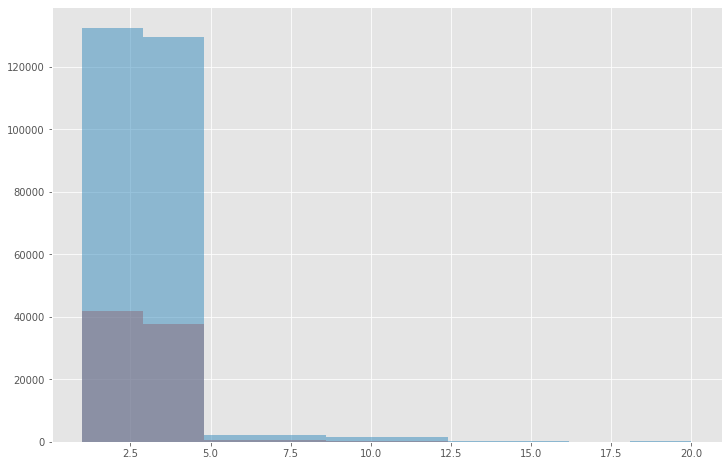

In [43]:
plt.hist((data['img_num'])[data['sold_fast'] == 1].values, bins=10,  alpha=0.5)
plt.hist((data['img_num'])[data['sold_fast'] == 0].values, bins=10,  alpha=0.5)
plt.show()

payment_available

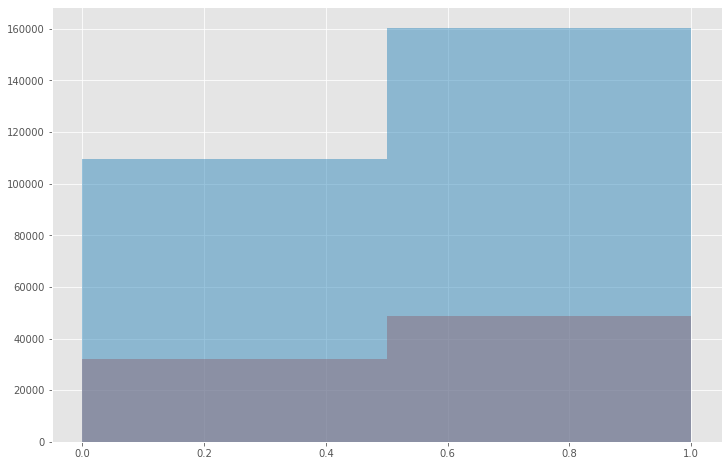

In [44]:
plt.hist((data['payment_available'] * 1)[data['sold_fast'] == 1].values, bins=2,  alpha=0.5)
plt.hist((data['payment_available'] * 1)[data['sold_fast'] == 0].values, bins=2,  alpha=0.5)
plt.show()

price

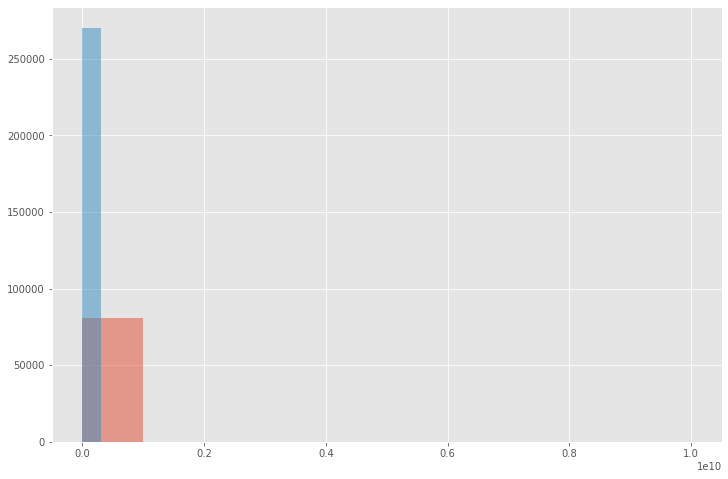

In [47]:
plt.hist((data['price'])[data['sold_fast'] == 1].values, bins=10,  alpha=0.5)
plt.hist((data['price'])[data['sold_fast'] == 0].values, bins=10,  alpha=0.5)
plt.show()

product_type

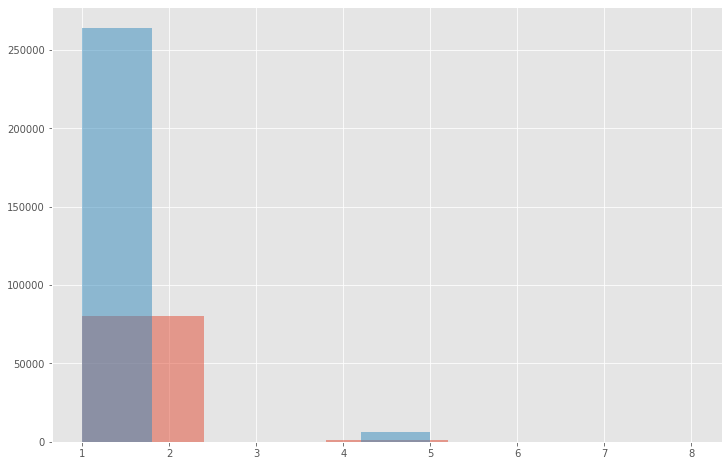

In [50]:
plt.hist((data['product_type'])[data['sold_fast'] == 1].values, bins=5,  alpha=0.5)
plt.hist((data['product_type'])[data['sold_fast'] == 0].values, bins=5,  alpha=0.5)
plt.show()

sold_mode

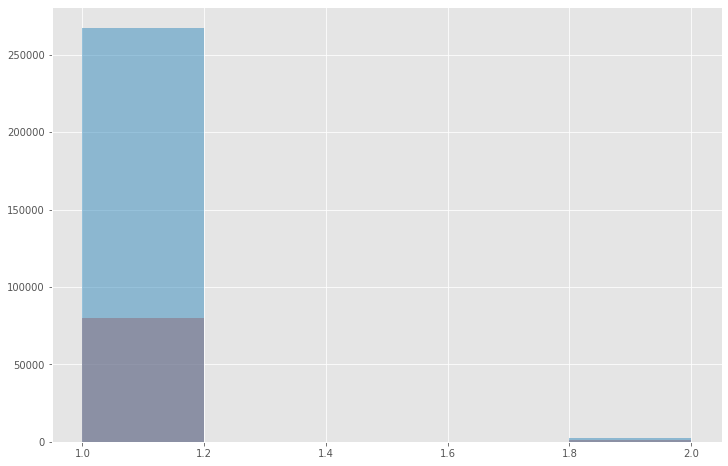

In [52]:
plt.hist((data['sold_mode'])[data['sold_fast'] == 1].values, bins=5,  alpha=0.5)
plt.hist((data['sold_mode'])[data['sold_fast'] == 0].values, bins=5,  alpha=0.5)
plt.show()

## Data split

In [11]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.33, random_state=42)

y_train = data_train['sold_fast'].values
y_test = data_test['sold_fast'].values

## Data preprocessing

As simple features we used 'img_num', 'lat', 'long', 'price', 'product_type', 'sold_mode', 'payment_available', 'delivery_available', also we conwerted to numeric categories cities, regions and catigories. We splitted date to vector of YYYY, MM, HH. We count numbers of words and count good woords ['отличн', 'хорош', 'торг', 'недорого', 'идеал', 'нов']. Another feture is count of lables per user and also if the city is the capital of region

In [12]:
cities = """Майкоп
Горно-Алтайск
 Уфа
 Улан-Удэ
 Махачкала
 Магас
 Нальчик
 Элиста
Черкесск
 Петрозаводск
 Сыктывкар
 Симферополь
 Йошкар-Ола
 Саранск
 Якутск
 Владикавказ
 Казань
 Кызыл
 Ижевск
 Абакан
 Грозный
 Чебоксары
 Барнаул
 Чита
 Петропавловск-Камчатский
 Краснодар
 Красноярск
 Пермь
Владивосток
 Ставрополь
 Хабаровск
 Благовещенск
Архангельск
 Астрахань
 Белгород
 Брянск
 Владимир
 Волгоград
 Вологда
 Воронеж
 Иваново
 Иркутск
 Калининград
 Калуга
 Кемерово
 Киров
 Кострома
 Курган
 Курск
 Санкт-Петербург
 Липецк
 Магадан
 Москва
Мурманск
 Нижний Новгород
 Великий Новгород
 Новосибирск
 Омск
 Оренбург
 Орёл
 Пенза
 Псков
 Ростов-на-Дону
 Рязань
 Самара
 Саратов
 Южно-Сахалинск
 Екатеринбург
 Смоленск
 Тамбов
 Тверь
 Томск
 Тула
 Тюмень
 Ульяновск
 Челябинск
 Ярославль
 Москва
 Санкт-Петербург
Севастополь Севастополь
Биробиджан
 Нарьян-Мар
 Ханты-Мансийск
 Анадырь
 Салехард"""

In [13]:
known_cities = set(map(lambda x: x.strip(), cities.split("\n")))

In [14]:
def get_user_tickets_count(users):
    userc = {}
    for user in users:
        if user not in userc.keys():
            userc[user] = 0
        userc[user] += 1
    return userc

In [24]:
def convert_date(date):
    date_splitted = date.split('-')
    year = int(date_splitted[0])
    month = int(date_splitted[1])
    day = int(date_splitted[2])
    return [year, month, day]

def is_region_capital(values):
    res = []
    for val in values:
        if val in known_cities:
            res.append(1)
        else:
            res.append(0)
    return res

def get_users_c(usersc, users):
    res = []
    for user in users:
        res.append(usersc[user])
    return res

def map_cat_to_proba(values, labels):
    cat_dict = {}
    for val in np.unique(values):
        labels_with_val = labels[values == val]
        total = len(labels_with_val)
        total_1 = len(labels_with_val[labels_with_val == 1])
        cat_dict[val] = 1.0 * total_1 / total
    return cat_dict

def cat_to_proba(cat_dict, values):
    probas = []
    for val in values:
        if val in cat_dict:
            probas.append(cat_dict[val])
        else:
            probas.append(0)
    return np.array(probas)

def text_to_words_len(text):
    text_splitted = text.split(' ')
    return len(text_splitted)

good_words = ['отличн', 'хорош', 'торг', 'недорого', 'идеал', 'нов']
def text_to_good_words(text):
    words = text.split(' ')
    good_words_counter = 0
    for word in words:
        for check_word in good_words:
            if word.startswith(check_word):
                good_words_counter += 1
    return np.sqrt(good_words_counter)

In [16]:
category_id_dict = map_cat_to_proba(data_train['category_id'].values, y_train)
subcategory_id_dict = map_cat_to_proba(data_train['subcategory_id'].values, y_train)

city_dict = map_cat_to_proba(data_train['city'].values, y_train)
region_dict = map_cat_to_proba(data_train['region'].values, y_train)

In [17]:
print("Categories: ", len(category_id_dict))
print("Subcategories: ", len(subcategory_id_dict))
print("Cities: ", len(city_dict))
print("Regions: ", len(region_dict))

Categories:  24
Subcategories:  280
Cities:  2115
Regions:  101


In [25]:
def data_preprocessing(data):
    cols_to_drop = ['product_id']
    data = data.drop(cols_to_drop, axis=1)
    
    cols1 = data[['img_num', 'lat', 'long', 'price', 'product_type', 'sold_mode']].values
    feature_date = data['date_created'].values
    cols2 = np.array([convert_date(i) for i in feature_date])
    cols3 = data[['payment_available', 'delivery_available']].values * 1
    
    cols4 = cat_to_proba(category_id_dict, data['category_id'].values).reshape(-1, 1)
    cols5 = cat_to_proba(subcategory_id_dict, data['subcategory_id'].values).reshape(-1, 1)
    cols6 = cat_to_proba(city_dict, data['city'].values).reshape(-1, 1)
    cols7 = cat_to_proba(region_dict, data['region'].values).reshape(-1, 1)
    
    feature_desc_text = data['desc_text'].values
    cols8 = np.array([text_to_words_len(t) for t in feature_desc_text]).reshape(-1, 1)
    cols9 = np.array([text_to_good_words(t) for t in feature_desc_text]).reshape(-1, 1)
    
    userc = get_user_tickets_count(data['owner_id'].values)
    cols10 = np.array(get_users_c(userc, data['owner_id'].values)).reshape(-1, 1)

    X = np.concatenate(tuple([cols1, cols2, cols3, cols4, cols5, cols6, cols7, cols8, cols9, cols10]), axis=1)
    
    return X

In [26]:
X_train = data_preprocessing(data_train)
X_test = data_preprocessing(data_test)

In [27]:
X_train.shape

(235358, 18)

# Machine-learning pipeline and prediction

Here you develop your pipeline, generate features for train and test sets
* Your pipeline should be reproducible - make sure you set all `random_states` if needed

## Classification

## Описание модели
В качестве модели было решено использовать XGDBoost, так как он хорошо подходит для задач бинарной классификации. Модель на основе стандартного градиентного бустинга с n_estimators=1000, learning_rate=0.02, max_depth=5.

In [31]:
from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=1000, learning_rate=0.02, max_depth=5, n_jobs=3, colsample_bytree=0.5, scale_pos_weight=1., subsample=0.5)

clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0,
       learning_rate=0.02, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=3,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1.0, seed=None,
       silent=None, subsample=0.5, verbosity=1)

In [32]:
y_train_pred = clf.predict_proba(X_train)[:, 1]
y_test_pred = clf.predict_proba(X_test)[:, 1]

In [33]:
from sklearn.metrics import roc_auc_score

auc_train = roc_auc_score(y_train, y_train_pred)
auc_test = roc_auc_score(y_test, y_test_pred)

print("Train AUC: ", auc_train)
print("Test AUC: ", auc_test)

Train AUC:  0.6715621455635232
Test AUC:  0.630989668614933


## Submission

In [34]:
X_submit = data_preprocessing(data_submit)

In [35]:
y_submit_pred = clf.predict_proba(X_submit)[:, 1]

In [36]:
product_id = data_submit['product_id'].values
data_submit = pd.DataFrame.from_dict({'product_id' : product_id, 'score' : y_submit_pred})
data_submit.to_csv('./to_submit', sep = ',', index = False)

# Model interpretation
Try to interpret your model results
* What **knowledge** does it reveal?